## 1. Import Packages

In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [3]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

## 2. GET data

In [4]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2021-07-01'
TRADE_START_DATE = '2021-07-01'
TRADE_END_DATE = '2022-10-01'

In [5]:
df = YahooDownloader(start_date = TRADE_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
finished AXP
[*********************100%***********************]  1 of 1 completed
finished AMGN
[*********************100%***********************]  1 of 1 completed
finished AAPL


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BA
[*********************100%***********************]  1 of 1 completed
finished CAT


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CSCO
[*********************100%***********************]  1 of 1 completed
finished CVX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished GS
[*********************100%***********************]  1 of 1 completed
finished HD


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished HON
[*********************100%***********************]  1 of 1 completed
finished IBM


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INTC
[*********************100%***********************]  1 of 1 completed
finished JNJ


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KO
[*********************100%***********************]  1 of 1 completed
finished JPM


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MCD
[*********************100%***********************]  1 of 1 completed
finished MMM


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MRK
[*********************100%***********************]  1 of 1 completed
finished MSFT


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NKE
[*********************100%***********************]  1 of 1 completed
finished PG


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TRV
[*********************100%***********************]  1 of 1 completed
finished UNH
[*********************100%***********************]  1 of 1 completed
finished CRM


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VZ
[*********************100%***********************]  1 of 1 completed
finished V


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WBA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WMT
[*********************100%***********************]  1 of 1 completed
finished DIS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished DOW
Shape of DataFrame:  (9480, 8)


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


In [6]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [7]:
df.shape

(9480, 8)

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2021-07-01,136.600006,137.330002,135.759995,136.300873,52485800,AAPL,3
1,2021-07-01,243.740005,247.100006,243.550003,237.151077,2091600,AMGN,3
2,2021-07-01,165.649994,167.369995,164.690002,164.393829,2685900,AXP,3
3,2021-07-01,240.360001,241.800003,238.610001,239.729996,9516200,BA,3
4,2021-07-01,219.160004,219.789993,216.149994,210.847687,2426300,CAT,3


In [9]:
print(len(df.tic.unique()))

30


## 3. Preprocess Data

In [10]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicato

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
finished ^VIX
Shape of DataFrame:  (315, 8)
Successfully added vix
Successfully added turbulence index


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


In [11]:
print(len(processed["tic"].unique()))

30


In [12]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [13]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-07-01,AAPL,136.600006,137.330002,135.759995,136.300873,52485800.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,136.300873,136.300873,15.48,0.0
1,2021-07-01,AMGN,243.740005,247.100006,243.550003,237.151077,2091600.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,237.151077,237.151077,15.48,0.0
2,2021-07-01,AXP,165.649994,167.369995,164.690002,164.393829,2685900.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,164.393829,164.393829,15.48,0.0
3,2021-07-01,BA,240.360001,241.800003,238.610001,239.729996,9516200.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,239.729996,239.729996,15.48,0.0
4,2021-07-01,CAT,219.160004,219.789993,216.149994,210.847687,2426300.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,210.847687,210.847687,15.48,0.0
5,2021-07-01,CRM,244.500000,246.589996,242.619995,244.979996,3899600.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,244.979996,244.979996,15.48,0.0
6,2021-07-01,CSCO,53.049999,53.599998,53.000000,51.109627,15074800.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,51.109627,51.109627,15.48,0.0
7,2021-07-01,CVX,106.949997,107.099998,105.739998,100.771156,10873200.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,100.771156,100.771156,15.48,0.0
8,2021-07-01,DIS,175.350006,177.600006,174.600006,177.259995,5887100.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,177.259995,177.259995,15.48,0.0
9,2021-07-01,DOW,64.220001,64.419998,63.419998,59.891258,3324700.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,59.891258,59.891258,15.48,0.0


## 4. Build A Market Environment in OpenAI Gym-style

In [14]:

trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)

print(len(trade))

9450


In [15]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-07-01,AAPL,136.600006,137.330002,135.759995,136.300873,52485800.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,136.300873,136.300873,15.48,0.0
0,2021-07-01,AMGN,243.740005,247.100006,243.550003,237.151077,2091600.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,237.151077,237.151077,15.48,0.0
0,2021-07-01,AXP,165.649994,167.369995,164.690002,164.393829,2685900.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,164.393829,164.393829,15.48,0.0
0,2021-07-01,BA,240.360001,241.800003,238.610001,239.729996,9516200.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,239.729996,239.729996,15.48,0.0
0,2021-07-01,CAT,219.160004,219.789993,216.149994,210.847687,2426300.0,3.0,0.0,141.413747,133.859004,100.0,66.666667,100.0,210.847687,210.847687,15.48,0.0


In [16]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [17]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [18]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}



## 5. Trading 

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.vix.describe()

In [ ]:
insample_risk_indicator.vix.quantile(0.996)

In [ ]:
insample_risk_indicator.turbulence.describe()

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

### testing 

In [19]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

In [20]:
trained_sac_path = "trained_models/trained_sac_30_full/"
df_account_value, df_actions = DRLAgent.DRL_prediction_load_from_file(
    model_name="sac", 
    environment = e_trade_gym,
    cwd=trained_sac_path)

Successfully load model trained_models/trained_sac_30_full/
hit end!


In [21]:
df_account_value.shape

(315, 2)

In [22]:
df_account_value.tail()

,date,account_value
310,2022-09-23,884202.975917
311,2022-09-26,871888.835696
312,2022-09-27,871122.051715
313,2022-09-28,888160.130236
314,2022-09-29,874685.980967


In [23]:
df_actions.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,62,39,0,0,79,80,86,66,53,0,...,21,0,73,25,89,56,0,0,85,0
2021-07-02,62,39,0,0,79,80,86,66,53,0,...,21,0,73,25,89,56,0,0,85,0
2021-07-06,62,39,0,0,79,80,86,66,53,0,...,21,0,73,25,89,56,0,0,85,0
2021-07-07,62,39,0,0,79,80,86,66,53,0,...,21,0,73,25,89,56,0,0,85,0
2021-07-08,62,39,0,0,79,80,86,66,53,0,...,21,0,73,25,89,56,0,0,85,0


## 7. Backtesting Results

### BackTestStats

In [24]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return         -0.101575
Cumulative returns    -0.125314
Annual volatility      0.186566
Sharpe ratio          -0.482616
Calmar ratio          -0.520385
Stability              0.444420
Max drawdown          -0.195193
Omega ratio            0.922390
Sortino ratio         -0.647960
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.883444
Daily value at risk   -0.023862
dtype: float64


/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [25]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
finished ^DJI
Shape of DataFrame:  (314, 8)
Annual return         -0.116418
Cumulative returns    -0.142919
Annual volatility      0.170216
Sharpe ratio          -0.644153
Calmar ratio          -0.558948
Stability              0.571531
Max drawdown          -0.208281
Omega ratio            0.897541
Sortino ratio         -0.848912
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.874183
Daily value at risk   -0.021880
dtype: float64


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [26]:
df_account_value.loc[0,'date']

'2021-07-01'

In [27]:
df_account_value.loc[len(df_account_value)-1,'date']

'2022-09-29'

### BackTestPlot

==============Compare to NDX===========
[*********************100%***********************]  1 of 1 completed
finished ^NDX
Shape of DataFrame:  (314, 8)


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2021-07-01
End date,2022-09-29
Total months,15
,Backtest
Annual return,-10.2%
Cumulative returns,-12.5%
Annual volatility,18.7%
Sharpe ratio,-0.48
Calmar ratio,-0.52
Stability,0.44
Max drawdown,-19.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.52,2021-11-08,2022-09-27,NaT,NaN
1,5.93,2021-09-02,2021-09-30,2021-10-20,35
2,3.52,2021-07-12,2021-07-19,2021-08-03,17
3,1.89,2021-08-16,2021-08-19,2021-08-24,7
4,0.92,2021-10-26,2021-10-27,2021-10-28,3


/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instea

Stress Events,mean,min,max
New Normal,-0.04%,-3.84%,3.37%


/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


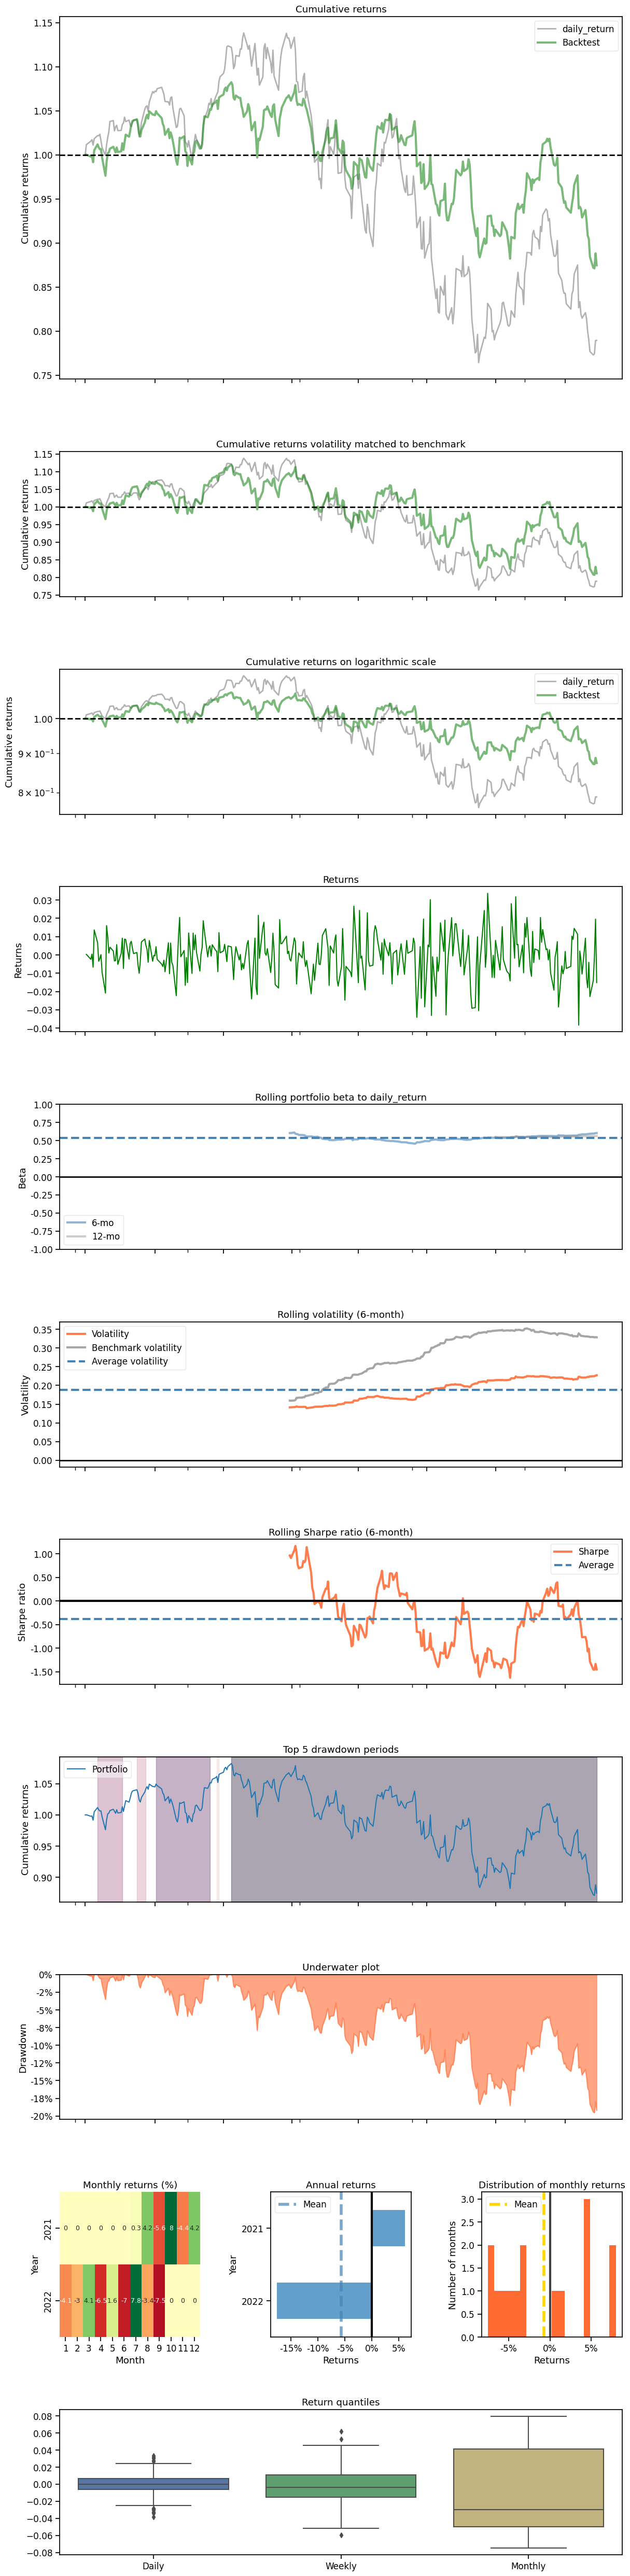

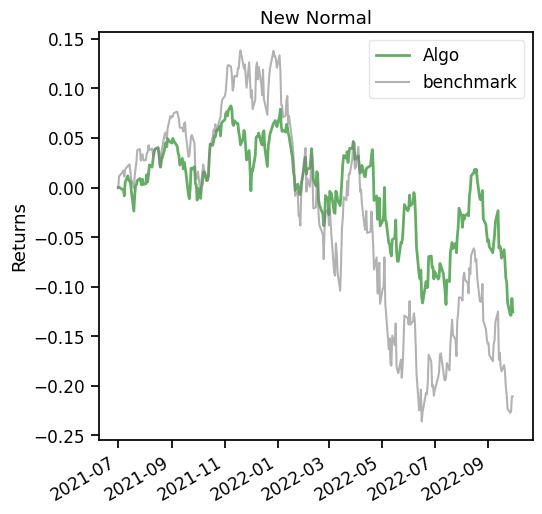

In [28]:
print("==============Compare to NDX===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^NDX', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])